In [2]:
library("quantmod")
library("tseries")
library("urca")

set.seed(123)

## Simulated cointegrated series

z <- rep(0, 10000)
for (i in 2:10000)
	z[i] <- z[i - 1] + rnorm(1)

p <- q <- r <- rep(0, 10000)

p <- 0.3 * z + rnorm(10000)
q <- 0.6 * z + rnorm(10000)
r <- 0.8 * z + rnorm(10000)

jotest = ca.jo(data.frame(p, q, r), type = "trace", K = 2, ecdet = "none", spec = "longrun")
summary(jotest)




###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.338903321 0.330365610 0.001431603

Values of teststatistic and critical values of test:

            test 10pct  5pct  1pct
r <= 2 |   14.32  6.50  8.18 11.65
r <= 1 | 4023.76 15.66 17.95 23.52
r = 0  | 8161.48 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

          p.l2        q.l2     r.l2
p.l2  1.000000  1.00000000 1.000000
q.l2  1.791324 -0.52269002 1.941449
r.l2 -1.717271  0.01589134 2.750312

Weights W:
(This is the loading matrix)

          p.l2         q.l2          r.l2
p.d -0.1381095 -0.771055116 -0.0003442470
q.d -0.2615348  0.404161806 -0.0006863351
r.d  0.2439540 -0.006556227 -0.0009068179



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 2.953447e-04 7.523999e-05 4.722005e-07

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  0.03  6.50  8.18 11.65
r <= 1 |  4.43 15.66 17.95 23.52
r = 0  | 21.73 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           V48.l2     V28.l2    V12.l2
V48.l2  1.0000000  1.0000000  1.000000
V28.l2 -0.4755001 -0.7326379  3.758417
V12.l2  8.0352178 -0.1751665 -1.491487

Weights W:
(This is the loading matrix)

             V48.l2        V28.l2       V12.l2
V48.d -1.879722e-05 -3.112733e-05 8.238157e-07
V28.d -5.624973e-05  1.447794e-04 8.042441e-07
V12.d -5.905660e-05 -9.757794e-06 1.531532e-07

[1] "-------------"
[1] "Done"


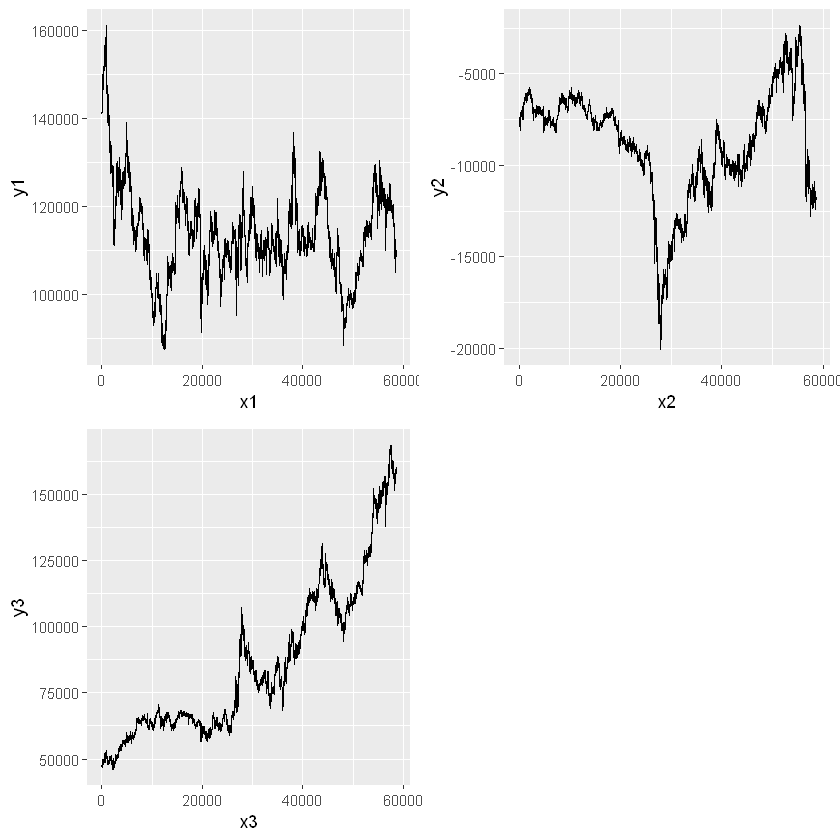

In [10]:
library("urca")
library("ggplot2")
library("gridExtra")
library("aTSA")

rm(list = ls())

file <- read.csv(file = "text.txt", sep = ",", header = FALSE)

x1<-as.numeric(row.names(file))

p <- as.vector(file[48])
q <- as.vector(file[28])
r <- as.vector(file[12])

#print(p)

jotest = ca.jo(data.frame(p, q, r), type = "trace", K = 2, ecdet = "none", spec = "longrun")
sum1 <- summary(jotest)

#print(sum1)
#print(head(sum1))

ss1<-as.list(attr(sum1,"V"))
print(sum1)

s = ss1[1] * p + ss1[2] * q + ss1[3] * r
s2 = ss1[4] * p + ss1[5] * q + ss1[6] * r
s3 = ss1[7] * p + ss1[8] * q + ss1[9] * r

dataframe <- data.frame(x1, s)
colnames(dataframe)<- c("x1", "y1")

dataframe2 <- data.frame(x1, s2)
colnames(dataframe2) <- c("x2", "y2")

dataframe3 <- data.frame(x1, s3)
colnames(dataframe3) <- c("x3", "y3")

p1 <- ggplot(data = dataframe, aes(x = x1, y = y1)) + geom_line()
p2 <- ggplot(data = dataframe2, aes(x = x2, y = y2)) + geom_line()
p3 <- ggplot(data = dataframe3, aes(x = x3, y = y3)) + geom_line()

grid.arrange(p1, p2, p3, nrow = 2, ncol=2)

print("-------------")
#dev.off()

print("Done")